In [1]:
import pde
import matplotlib.pyplot as plt
import numpy as np

In [2]:
grid = pde.CartesianGrid([[0,1]],100,periodic=True) #inicijalizacija domene

In [3]:
Tig = 10 #ignition temperature
cLFL = 0.1  #lower flammability limit koncentracija
A = 1 #stopa izgaranja
C1 = 0.1 #heat transfer coefficient
C2 = 0.1 #1/(karakteristicno vrijeme difuzije para) 
T0 = 1 #ambientalna temperatura
c0 = 1 #saturacijska koncentracija para

In [4]:
pobuda = pde.ScalarField.from_expression(grid, '15*exp(-(x-0.5)**2/0.001)') #upaljac

In [5]:
Tinit = pde.ScalarField(grid, T0) + pobuda #pocetna temperatura
cinit = pde.ScalarField(grid, c0) #pocetna koncentracija
init = pde.FieldCollection([Tinit,cinit])

In [6]:
def alpha(x): #thermal diffusivity
    return 0.1
def D(x): #mass diffusivity
    return 0.1
def r(T,c): #stopa reakcije
    x = np.array([T,c]).T
    return np.piecewise(x, [np.logical_and(x[:,0] > Tig, x[:,1] > cLFL)], [A,0])[:,0]
def h(T): #heat loss
    return C1*(T-T0)
def e(T,c): #isparavanje + gubitci 
    return (c0-c)*C2

## Model 0.1
$$ \partial_t T= \alpha \partial_x^2T +qr-h$$ $$\partial_t c = D \partial_x^2 c -r+e$$
$$ r(T,c) = \begin{array}{cc}
  \Bigg \{ & 
    \begin{array}{cc}
      A ,& T>T_{\mathrm{ig}} \wedge c>c_{\mathrm{LFL}} \\
      0 ,& \mathrm{otherwise} \\
    \end{array}
\end{array}$$
$$ h(T) =C_1(T-T_0)$$
$$ e(T,c) = C_2(c_0-c)$$

In [7]:
#definicija sustava
eq = pde.PDE({'T':"a(x)*laplace(T)+q*r(T,c)-h(T)", 'c': "D(x)*laplace(c)-r(T,c)+e(T,c)"},user_funcs={'a': alpha, 'r': r, 'h': h, 'D':D, 'e':e}, consts={'q':550})

In [8]:
storage=pde.MemoryStorage()
result=eq.solve(init, t_range=3,dt = 1e-4, tracker=[storage.tracker(1e-2)], backend="numpy")

[endymion:3277178] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.endymion.1000/jf.0/2261319680/shared_mem_cuda_pool.endymion could be created.
[endymion:3277178] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


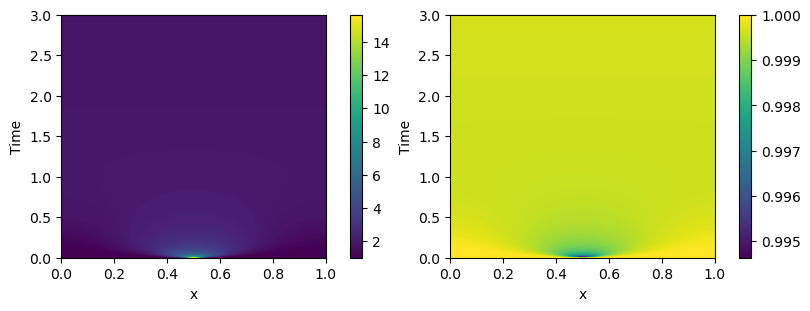

In [9]:
pde.plot_kymographs(storage)

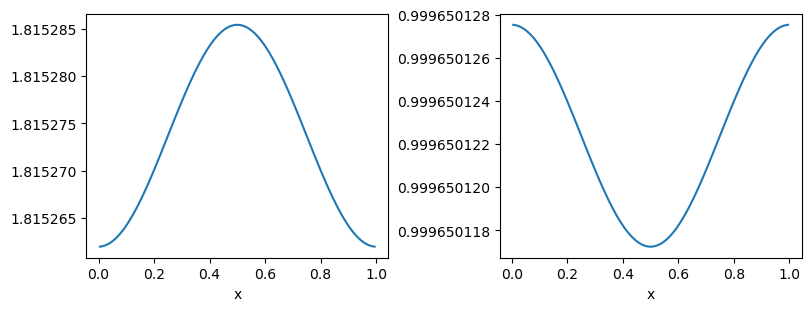

In [12]:
result.plot() #konacno stanje

In [11]:
#pde.movie(storage,filename="sim.mov")